# Derivada y descenso del gradiente


Este curso presenta el algoritmo de **descenso del gradiente**, un pilar fundamental del *deep learning*. Para comprenderlo bien, comencemos con un repaso sobre las derivadas.


In [1]:
import matplotlib.pyplot as plt 
import numpy as np

## Comprensión intuitiva de la derivada


Consideremos una función: $f(x) = 2x^2 - 3x + 4$


In [3]:
def f(x):
  return 2*x**2-3*x+4
f(3)

13

Grafiquemos esta función usando *matplotlib*.


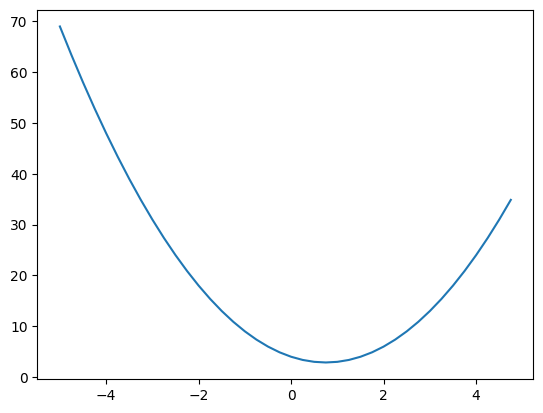

In [4]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

La **derivada** proporciona la pendiente de la tangente a la curva en un punto dado.
Para calcularla, utilizamos la siguiente fórmula:
$f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}$.
Con un valor pequeño de $h$, podemos estimar la pendiente de forma numérica.

**Nota**: La pendiente indica cómo varía $y$ cuando $x$ cambia. Por ejemplo, si $x$ aumenta en 1 y $y$ aumenta en 2, la pendiente es 2.


In [4]:
h=0.0001
x=-1.0
print("Dérivée en x=-1 : ", (f(x+h)-f(x))/h)
x=2.0
print("Dérivée en x=2 : ", (f(x+h)-f(x))/h)

Dérivée en x=-1 :  -6.999800000002665
Dérivée en x=2 :  5.000200000004895


El gráfico muestra que la pendiente es **negativa** en $x = -1$ y **positiva** en $x = 2$.
El **signo** de la derivada indica la dirección de la pendiente, mientras que su **valor absoluto** refleja su intensidad.
Verifiquemos esto con las [derivadas comunes](https://es.wikipedia.org/wiki/Anexo:Tabla_de_derivadas):
Para $f(x) = 2x^2 - 3x + 4$, obtenemos $f'(x) = 4x - 3$.
Así, $f'(-1) \approx -7$ y $f'(2) \approx 5$.
Los resultados no son exactos porque $h$ no es infinitamente pequeño.


In [5]:
# On définit deriv_f = f'(x)
def deriv_f(x):
  return 4*x-3

## Fundamentos de la optimización mediante descenso del gradiente


La **optimización** busca minimizar o maximizar una **función objetivo**.
Para encontrar el mínimo, existen dos enfoques principales:

1. **Resolver $f'(x) = 0$**:
   $4x - 3 = 0 \implies x = \frac{3}{4}$.
   En este caso, esto nos da el mínimo, pero no siempre es aplicable en general.

2. **Utilizar el descenso del gradiente**:
   Partimos de un punto inicial, por ejemplo, $x = 2$.
   Calculamos $f'(2) = 5$. Una pendiente positiva indica que, si $x$ aumenta, $f(x)$ también lo hace (y viceversa).
   Para minimizar $f(x)$, ajustamos $x$ usando un factor $\alpha$ (denominado *tasa de aprendizaje*).
   Obtenemos $x_{nuevo} = x - \text{pendiente} \times \alpha = 2 - 5 \times 0.1 = 1.5$.
   Recalculamos $f'(1.5) = 3$ (aún positiva), por lo que seguimos disminuyendo $x$.
   El **descenso del gradiente** ajusta $x$ iterativamente hasta alcanzar un mínimo, siempre considerando la pendiente en cada paso.


In [6]:
# Descente du gradient
x=2.0 # valeur aléatoire de x
alpha=0.01 # pas
iterations=250 # nombre d'itérations

for i in range(iterations):
  grad=deriv_f(x)
  if (grad>0):
    x=x-alpha
  elif(grad<0):
    x=x+alpha
  else:
    print("minimum found YAY, x = ",x)
print("approximate minimum found YAY, x = ",x)

approximate minimum found YAY, x =  0.7599999999999989


Obtenemos $x \approx \frac{3}{4}$. Con un paso más pequeño ($\alpha$) y más iteraciones, podemos refinar el resultado.


## La regla de la cadena


Antes de avanzar, recordemos una regla matemática esencial para el *deep learning*: **la regla de la cadena**.
Esta regla permite entrenar los parámetros de las capas ocultas de una red neuronal.
Si $y$ depende de $u$, y $u$ depende de $x$, entonces:
$\frac{dy}{dx} = \frac{dy}{du} \cdot \frac{du}{dx}$.


Tomemos un ejemplo con funciones dependientes:
$u = 2x^2 - x - 2$
$y = 3u + 1$
Aplicando la regla de la cadena:
$\frac{dy}{dx} = \frac{dy}{du} \cdot \frac{du}{dx}$, donde $\frac{dy}{du} = 3$ y $\frac{du}{dx} = 4x - 1$.
Por lo tanto, $\frac{dy}{dx} = 3(4x - 1) = 12x - 3$.
Ahora sabemos cómo $x$ afecta a $y$, lo que nos permite aplicar el algoritmo de **descenso del gradiente**.


In [7]:
x=2.0
def deriv_y_x(x):
  return 6*x-3
for i in range(iterations):
  grad=deriv_y_x(x)
  if (grad>0):
    x=x-alpha
  elif(grad<0):
    x=x+alpha
  else:
    print("minimum found YAY, x = ",x)
print("approximate minimum found YAY, x = ",x)

approximate minimum found YAY, x =  0.49999999999999867


## Optimización de múltiples variables


Hasta ahora, hemos buscado el mínimo de una función con una sola variable $x$.
Una ventaja de los métodos de optimización es que podemos optimizar **varias variables simultáneamente** mediante el descenso del gradiente. Para ello, es necesario calcular la derivada con respecto a cada variable.


Consideremos un modelo con 3 variables: $a$, $b$ y $c$:
$u = 3a^2 - 2a + b^2 + 1$
$y = 2u + c$
Para aplicar el **descenso del gradiente**, calculamos $\frac{dy}{da}$, $\frac{dy}{db}$ y $\frac{dy}{dc}$ usando la regla de la cadena:

- Para $a$:
  $\frac{dy}{da} = \frac{dy}{du} \cdot \frac{du}{da} = 2(6a - 2) = 12a - 4$

- Para $b$:
  $\frac{dy}{db} = \frac{dy}{du} \cdot \frac{du}{db} = 2(2b) = 4b$

- Para $c$:
  $\frac{dy}{dc} = 1$

Ahora ya podemos aplicar el algoritmo de **descenso del gradiente**.


In [8]:
def deriv_y_a(a):
  return 12*a-4
def deriv_y_b(b):
  return 4*b
def deriv_y_c(c):
  return 1

a=1.0
b=1.0
c=1.0
alpha=0.05
def deriv_y_x(x):
  return 6*x-3
for i in range(iterations):
  grad_a=deriv_y_a(a)
  grad_b=deriv_y_b(b)
  grad_c=deriv_y_c(b)
  if (grad_a>0):
    a=a-alpha
  else:
    a=a+alpha
  if (grad_b>0):
    b=b-alpha
  else:
    b=b+alpha
  if (grad_c>0):
    c=c-alpha
  else:
    c=c+alpha
print("approximate minimum found YAY, a = "+str(a)+" b = "+str(b)+" c = "+str(c))

approximate minimum found YAY, a = 0.29999999999999966 b = -3.191891195797325e-16 c = -11.50000000000003


Hemos encontrado valores que minimizan $y$:
- $c$ tiende a **menos infinito** tras muchas iteraciones.
- $b$ converge a **0**.
- $a$ alcanza un valor de **0.3**.
